In [2]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
sales = pd.read_csv('C:/Users/sarah/Downloads/sales_data5.csv')

sales.head()

,customer_id,status,account_id,product_units,date,customer_names,product,account_type,customer_type,total_amount,...,town,sale_date,age,gender,promo_payplan,discount,promo_check,promo,customer_source,Conversion Time
0,709ead92,NaN,0FC86540,1,12/04/2018 0:00:00,Charles Muange,Rainmaker,CASH,Individual,50000,...,NaN,12/04/2018 0:00:00,NaN,NaN,NaN,0,0,0,NaN,0.0
1,7BB639D0,NaN,0rnwpymN,1,19/01/2018 00:00:00,MACARIA SAMMY KIYO,Rainmaker,CASH,Individual,50000,...,NaN,19/01/2018 00:00:00,NaN,NaN,NaN,0,0,0,NaN,0.0
2,11Ffer4X,NaN,0WZdyMP4,1,28/08/2018 00:00:00,Fred Muoka,Rainmaker,CASH,Individual,50000,...,NaN,28/08/2018 15:04:00,NaN,NaN,NaN,0,0,0,NaN,0.0
3,v6iGCPzB,NaN,1EC21A07,1,24/10/2018 00:00:00,Francis Oulu,Rainmaker,CASH,Individual,50000,...,NaN,24/10/2018 12:38:00,NaN,NaN,NaN,0,0,0,NaN,0.0
4,1238AD44,NaN,1PGMRLP1,1,09/10/2017 0:00:00,Emmanuel Lomoit,Rainmaker,CASH,Individual,50000,...,NaN,09/10/2017 0:00:00,NaN,NaN,NaN,0,0,0,NaN,0.0


In [3]:
print(list(sales.columns))

['customer_id', 'status', 'account_id', 'product_units', 'date', 'customer_names', 'product', 'account_type', 'customer_type', 'total_amount', 'region', 'county', 'payplan_name', 'department_name', 'employee_sa', 'total_price', 'town', 'sale_date', 'age', 'gender', 'promo_payplan', 'discount', 'promo_check', 'promo', 'customer_source', 'Conversion Time']


In [4]:
print(np.unique(sales['age'].tolist()))

['0' '18 to 30 years' '1947-01-01 12:00:00' '1950-01-01 14:50:53' '1959'
 '1961-10-08 15:24:47' '1962-08-25 16:25:56' '1963-06-04 17:45:38'
 '1965-05-14 12:10:23' '1966' '1967-01-01 0:00:00' '1970' '1973'
 '1975-01-01 13:06:11' '1975-11-18 16:28:45' '1977-07-10 16:46:55'
 '1977-10-30 11:38:55' '1977-12-22 12:20:59' '1981-12-12 10:49:21'
 '1986-06-03 12:49:15' '2020-05-13 11:45:58' '2020-05-13 12:55:45'
 '2020-05-13 14:05:19' '2020-05-13 14:12:32' '2020-05-13 15:24:19'
 '2020-05-13 15:30:46' '2020-05-13 15:48:23' '2020-05-13 17:40:25'
 '2020-05-14 12:06:21' '2020-05-14 12:22:51' '2020-05-14 12:29:09'
 '2020-05-14 15:15:11' '2020-05-14 15:53:34' '2020-05-15 15:25:21'
 '2020-05-15 16:14:58' '2020-05-20 15:59:02' '2020-05-21 10:57:16'
 '2020-06-09 11:49:48' '2020-06-09 14:25:23' '2020-06-09 15:00:38'
 '2020-06-10 13:02:26' '2020-06-24 11:12:58' '31 to 45 years'
 '46 to 55 years' 'Older than 55 years' 'Younger than 18' 'nan']


In [5]:
sales['age'] = sales['age'].replace(['0','1947-01-01 12:00:00','1950-01-01 14:50:53','1959',
 '1961-10-08 15:24:47','1962-08-25 16:25:56','1963-06-04 17:45:38',
 '1965-05-14 12:10:23','1966','1967-01-01 00:00:00','1967-01-01 0:00:00','1970','1973',
 '1975-01-01 13:06:11','1975-11-18 16:28:45','1977-07-10 16:46:55',
 '1977-10-30 11:38:55','1977-12-22 12:20:59','1981-12-12 10:49:21',
 '1986-06-03 12:49:15','2020-05-13 11:45:58','2020-05-13 12:55:45',
 '2020-05-13 14:05:19','2020-05-13 14:12:32','2020-05-13 15:24:19',
 '2020-05-13 15:30:46','2020-05-13 15:48:23','2020-05-13 17:40:25',
 '2020-05-14 12:06:21','2020-05-14 12:22:51','2020-05-14 12:29:09',
 '2020-05-14 15:15:11','2020-05-14 15:53:34','2020-05-15 15:25:21',
 '2020-05-15 16:14:58','2020-05-20 15:59:02','2020-05-21 10:57:16',
 '2020-06-09 11:49:48','2020-06-09 14:25:23','2020-06-09 15:00:38',
 '2020-06-10 13:02:26','2020-06-24 11:12:58' ],np.nan)

In [6]:
sales.describe()

,product_units,total_amount,total_price,promo_payplan,discount,promo_check,promo,Conversion Time
count,11696.000000,1.169600e+04,1.169600e+04,1174.0,11696.000000,11696.000000,11696.000000,11670.000000
mean,1.010089,5.852721e+04,1.232255e+05,1.0,0.073529,0.066689,0.163902,1163.869580
std,0.161441,4.772388e+04,4.474006e+04,0.0,0.286024,0.249494,0.374794,3377.471988
min,1.000000,1.594000e+03,1.000000e+04,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.940000e+04,8.680000e+04,1.0,0.000000,0.000000,0.000000,3.000000
50%,1.000000,5.000000e+04,1.360000e+05,1.0,0.000000,0.000000,0.000000,43.000000
75%,1.000000,7.740000e+04,1.503000e+05,1.0,0.000000,0.000000,0.000000,502.000000
max,7.000000,1.500000e+06,1.030151e+06,1.0,2.000000,1.000000,4.000000,36059.000000


# Exploring the Data 

Text(0.5, 1.0, 'Distribution of Gender')

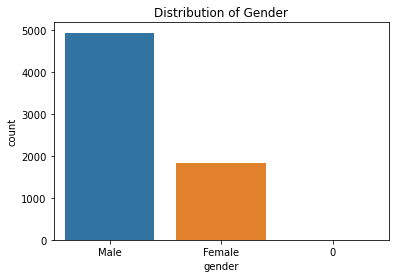

In [7]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='gender', data=sales)
plt.title('Distribution of Gender')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

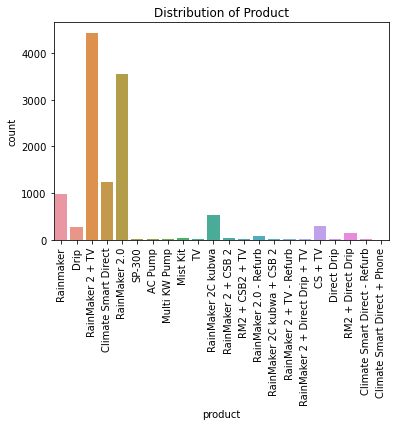

In [8]:
# See the distribution of product to recognize different distributions
sns.countplot(x='product', data=sales)
plt.title('Distribution of Product')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

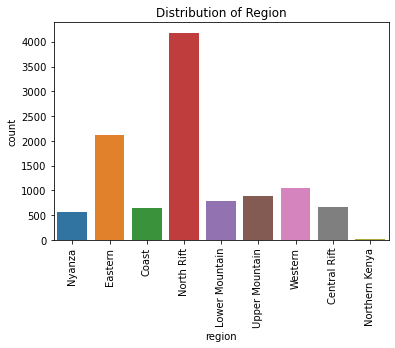

In [9]:
# See the distribution of region to recognize different distributions
sns.countplot(x='region', data=sales)
plt.title('Distribution of Region')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

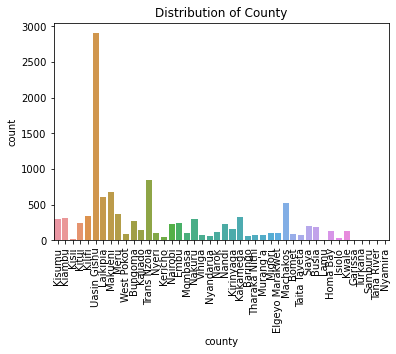

In [10]:
# See the distribution of region to recognize different distributions
sns.countplot(x='county', data=sales)
plt.title('Distribution of County')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

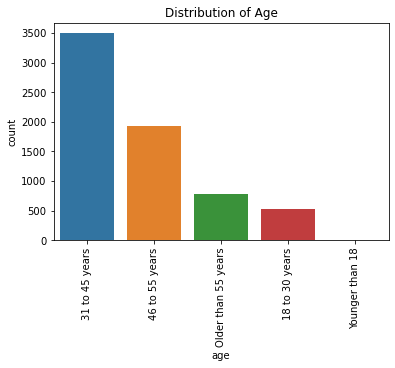

In [11]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='age', data=sales)
plt.title('Distribution of Age')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

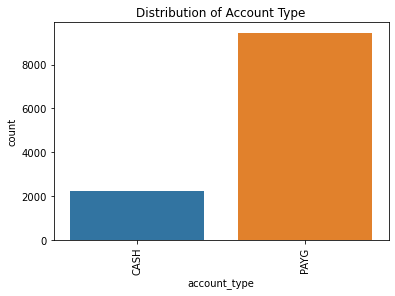

In [12]:
# See the distribution of account type to recognize different distributions
sns.countplot(x='account_type', data=sales)
plt.title('Distribution of Account Type')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of Customer Type')

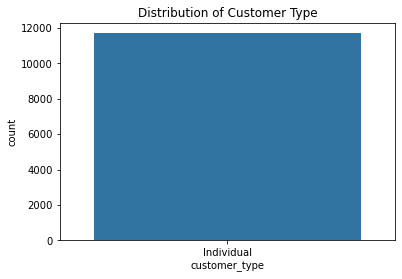

In [13]:
# See the distribution of customer type to recognize different distributions
sns.countplot(x='customer_type', data=sales)
plt.title('Distribution of Customer Type')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

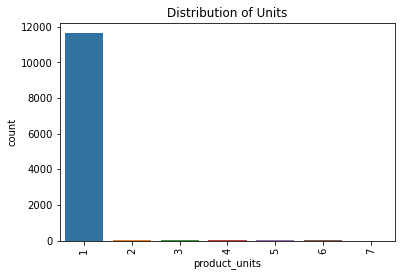

In [14]:
# See the distribution of units to recognize different distributions
sns.countplot(x='product_units', data=sales)
plt.title('Distribution of Units')
plt.xticks(rotation=90)

Text(0.5, 0, 'total_price')

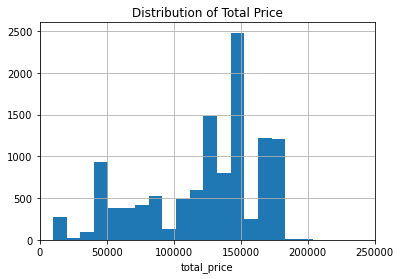

In [15]:
# Create a histogram of total price
sales.hist('total_price', bins=100)
plt.xlim(left=0,right = 250000)
plt.title('Distribution of Total Price')
plt.xlabel('total_price')

Text(0.5, 0, 'Conversion Time')

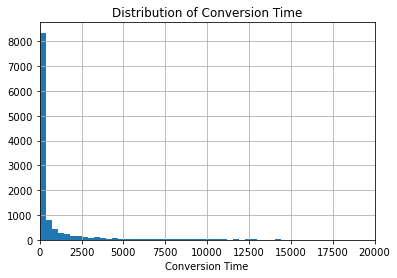

In [16]:
# Create a histogram of total price
sales.hist('Conversion Time', bins=100)
plt.xlim(left=0,right = 20000)
plt.title('Distribution of Conversion Time')
plt.xlabel('Conversion Time')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

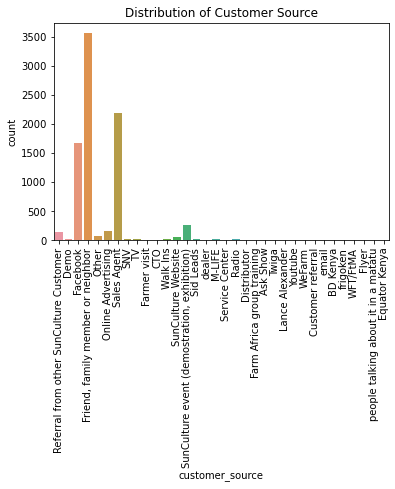

In [17]:
# See the distribution of customer source to recognize different distributions
sns.countplot(x='customer_source', data=sales)
plt.title('Distribution of Customer Source')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

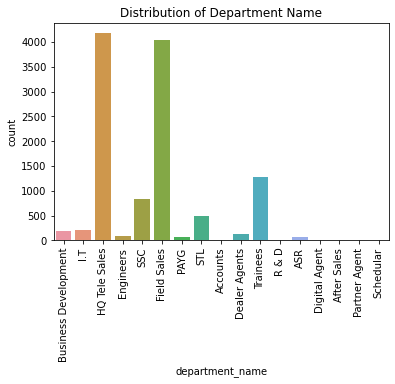

In [18]:
# See the distribution of department name to recognize different distributions
sns.countplot(x='department_name', data=sales)
plt.title('Distribution of Department Name')
plt.xticks(rotation=90)

In [19]:
sales2 = sales[['product_units','product', 'account_type', 'town','department_name','total_price','age', 'gender','customer_source','Conversion Time']]

In [20]:
sales2.shape

(11696, 10)

In [21]:
sales3 = sales2.dropna()
sales3.shape

(6207, 10)

In [22]:
sales3.head()

,product_units,product,account_type,town,department_name,total_price,age,gender,customer_source,Conversion Time
4338,1,RainMaker 2C kubwa,PAYG,Kericho,HQ Tele Sales,118375,31 to 45 years,Male,Facebook,451.0
4339,1,CS + TV,PAYG,lavington,HQ Tele Sales,119375,31 to 45 years,Female,Facebook,1.0
4340,1,CS + TV,PAYG,MUMIAS,HQ Tele Sales,119375,31 to 45 years,Male,Facebook,738.0
4341,1,RainMaker 2C kubwa,PAYG,Kitui,HQ Tele Sales,118375,31 to 45 years,Male,Facebook,5.0
4342,1,CS + TV,PAYG,joska,HQ Tele Sales,112175,31 to 45 years,Female,Facebook,8.0


# Scaling 

In [23]:
def apply_log1p_transformation(dataframe, column):
    '''This function takes a dataframe and a column in the string format
    then applies numpy log1p transformation to the column
    as a result returns log1p applied pandas series'''

    
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

In [24]:
apply_log1p_transformation(sales3,'product_units')

4338     0.693147
4339     0.693147
4340     0.693147
4341     0.693147
4342     0.693147
           ...   
11625    0.693147
11626    0.693147
11628    0.693147
11686    1.098612
11690    1.098612
Name: log_product_units, Length: 6207, dtype: float64

In [25]:
apply_log1p_transformation(sales3,'total_price')

4338     11.681621
4339     11.690033
4340     11.690033
4341     11.681621
4342     11.627824
           ...    
11625    11.904765
11626    11.681621
11628    12.070047
11686    11.945986
11690    11.065090
Name: log_total_price, Length: 6207, dtype: float64

In [26]:
apply_log1p_transformation(sales3,'Conversion Time')

4338     6.113682
4339     0.693147
4340     6.605298
4341     1.791759
4342     2.197225
           ...   
11625    1.386294
11626    5.181784
11628    7.712891
11686    4.553877
11690    3.135494
Name: log_Conversion Time, Length: 6207, dtype: float64

# Label Encoding

In [27]:
sales3['product'] = sales3['product'].astype('category')
sales3['product_cat'] =  sales3['product'].cat.codes
sales3['account_type'] = sales3['account_type'].astype('category')
sales3['account_type_cat'] =  sales3['account_type'].cat.codes
sales3['town'] = sales3['town'].astype('category')
sales3['town_cat'] =  sales3['town'].cat.codes
sales3['department_name'] = sales3['department_name'].astype('category')
sales3['department_name_cat'] =  sales3['department_name'].cat.codes
sales3['age'] = sales3['age'].astype('category')
sales3['age_cat'] =  sales3['age'].cat.codes
sales3['gender'] = sales3['gender'].astype('category')
sales3['gender_cat'] =  sales3['gender'].cat.codes
sales3['customer_source'] = sales3['customer_source'].astype('category')
sales3['customer_source_cat'] =  sales3['customer_source'].cat.codes

In [28]:
sales3.loc[sales3['town_cat'] == 89]

,product_units,product,account_type,town,department_name,total_price,age,gender,customer_source,Conversion Time,log_product_units,log_total_price,log_Conversion Time,product_cat,account_type_cat,town_cat,department_name_cat,age_cat,gender_cat,customer_source_cat
4354,1,Climate Smart Direct,PAYG,Eldoret,HQ Tele Sales,85175,31 to 45 years,Male,Facebook,26.0,0.693147,11.352475,3.295837,1,1,89,6,1,2,0
4361,1,Climate Smart Direct,PAYG,Eldoret,HQ Tele Sales,85175,31 to 45 years,Male,Facebook,5496.0,0.693147,11.352475,8.611958,1,1,89,6,1,2,0
4372,1,Climate Smart Direct,PAYG,Eldoret,HQ Tele Sales,85175,31 to 45 years,Male,Facebook,21.0,0.693147,11.352475,3.091042,1,1,89,6,1,2,0
4378,1,Climate Smart Direct,PAYG,Eldoret,HQ Tele Sales,85175,31 to 45 years,Male,Facebook,337.0,0.693147,11.352475,5.823046,1,1,89,6,1,2,0
4379,1,Climate Smart Direct,PAYG,Eldoret,HQ Tele Sales,72399,31 to 45 years,Male,Facebook,192.0,0.693147,11.189962,5.262690,1,1,89,6,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11601,1,RainMaker 2.0,PAYG,Eldoret,Field Sales,135666,18 to 30 years,Female,"Friend, family member or neighbor",7.0,0.693147,11.817959,2.079442,12,1,89,5,0,1,2
11604,1,RainMaker 2 + TV,PAYG,Eldoret,Field Sales,166799,18 to 30 years,Female,"Friend, family member or neighbor",1343.0,0.693147,12.024551,7.203406,10,1,89,5,0,1,2
11608,1,RainMaker 2 + TV,PAYG,Eldoret,Field Sales,150300,18 to 30 years,Male,"Friend, family member or neighbor",1014.0,0.693147,11.920395,6.922644,10,1,89,5,0,2,2
11617,1,RainMaker 2 + TV,PAYG,Eldoret,Field Sales,177563,18 to 30 years,Female,"Friend, family member or neighbor",43.0,0.693147,12.087086,3.784190,10,1,89,5,0,1,2


In [29]:
sales4 = sales3.iloc[:,10:]
sales4.head()

,log_product_units,log_total_price,log_Conversion Time,product_cat,account_type_cat,town_cat,department_name_cat,age_cat,gender_cat,customer_source_cat
4338,0.693147,11.681621,6.113682,14,1,230,6,1,2,0
4339,0.693147,11.690033,0.693147,0,1,741,6,1,1,0
4340,0.693147,11.690033,6.605298,0,1,340,6,1,2,0
4341,0.693147,11.681621,1.791759,14,1,293,6,1,2,0
4342,0.693147,11.627824,2.197225,0,1,682,6,1,1,0


In [30]:
sales4.to_csv('sales_data6.csv')

In [35]:
sales5 = sales3.loc[:,['product_units','total_price','Conversion Time']]
sales5.head()

,product_units,total_price,Conversion Time
4338,1,118375,451.0
4339,1,119375,1.0
4340,1,119375,738.0
4341,1,118375,5.0
4342,1,112175,8.0


# K-Prototype Clustering

In [63]:
from kmodes.kprototypes import KPrototypes
from sklearn import metrics

In [56]:
#dataframe to an array
sales_array = sales4.values
#converting numerical columns datatype as float
sales_array[:,:2] = sales_array[:,:2].astype(float)
#index of categorical columns
categorical_index = list(range(2,9))

# Hyperparameter Tuning (Elbow Method)

In [57]:
# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)
        
    ##sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    


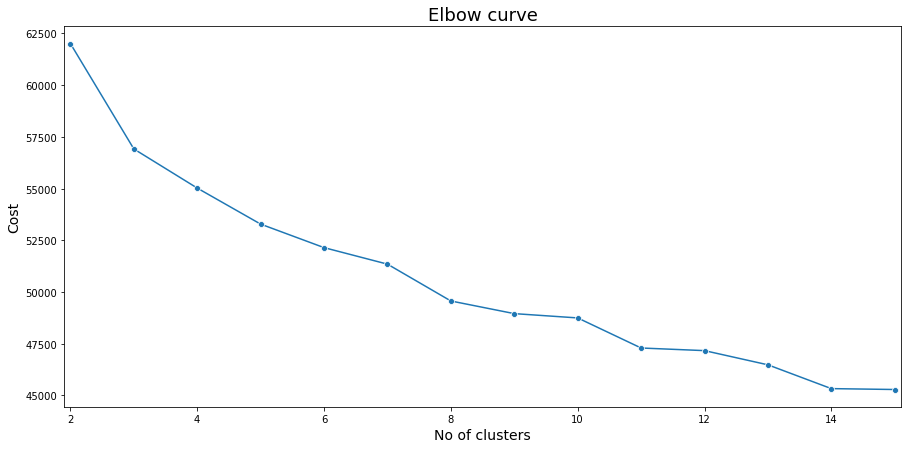

In [58]:
# Plotting elbow curve for k=2 to k=15
plot_elbow_curve(2,15,sales_array)

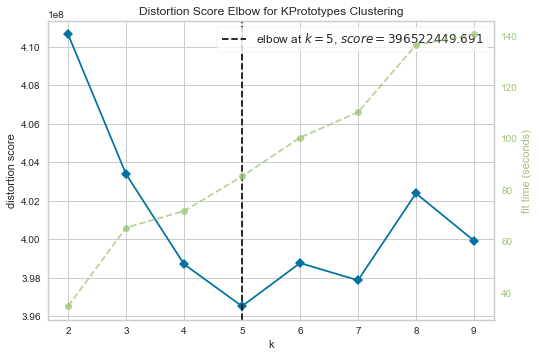

In [69]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model =  KPrototypes()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(sales_array,categorical=categorical_index)        # Fit data to visualizer
visualizer.show()   

In [70]:
model_5 = KPrototypes(n_clusters=5, init='Huang', random_state=42, n_jobs=-1)
model_5.fit_predict(sales_array, categorical=categorical_index)
print(model_5.cost_)
#new column for cluster labels associated with each subject
sales4['cluster'] = model_5.labels_

53284.20811156476


In [72]:
sales4.head()

,log_product_units,log_total_price,log_Conversion Time,product_cat,account_type_cat,town_cat,department_name_cat,age_cat,gender_cat,customer_source_cat,cluster
4338,0.693147,11.681621,6.113682,14,1,230,6,1,2,0,3
4339,0.693147,11.690033,0.693147,0,1,741,6,1,1,0,3
4340,0.693147,11.690033,6.605298,0,1,340,6,1,2,0,3
4341,0.693147,11.681621,1.791759,14,1,293,6,1,2,0,3
4342,0.693147,11.627824,2.197225,0,1,682,6,1,1,0,3


In [73]:
sales6 = sales4.join(sales5, how = 'outer')
sales6.head()

,log_product_units,log_total_price,log_Conversion Time,product_cat,account_type_cat,town_cat,department_name_cat,age_cat,gender_cat,customer_source_cat,cluster,product_units,total_price,Conversion Time
4338,0.693147,11.681621,6.113682,14,1,230,6,1,2,0,3,1,118375,451.0
4339,0.693147,11.690033,0.693147,0,1,741,6,1,1,0,3,1,119375,1.0
4340,0.693147,11.690033,6.605298,0,1,340,6,1,2,0,3,1,119375,738.0
4341,0.693147,11.681621,1.791759,14,1,293,6,1,2,0,3,1,118375,5.0
4342,0.693147,11.627824,2.197225,0,1,682,6,1,1,0,3,1,112175,8.0


In [74]:
sales6.groupby('cluster').agg(['median' ,'mean']).T

cluster                                 0              1              2  \
log_product_units   median       0.693147       0.693147       0.693147   
                    mean         0.693147       0.693147       0.693147   
log_total_price     median      11.904765      11.842229      12.024551   
                    mean        11.829445      11.770962      11.945179   
log_Conversion Time median       4.158883       4.527194       3.555348   
                    mean         4.338456       4.376954       4.016501   
product_cat         median      10.000000      12.000000      10.000000   
                    mean         9.295512       9.839416       9.732571   
account_type_cat    median       1.000000       1.000000       1.000000   
                    mean         0.988906       0.992701       0.993143   
town_cat            median     293.000000     421.000000     285.000000   
                    mean       365.013111     452.501217     351.668571   
department_name_cat median       6.000000       6.000000       6.000000   
                    mean         6.904186       6.911192       7.539429   
age_cat             median       1.000000       1.000000       2.000000   
                    mean         1.522441       1.332117       1.685714   
gender_cat          median       2.000000       2.000000       1.000000   
                    mean         1.716591       1.864964       1.320000   
customer_source_cat median       9.000000       2.000000       2.000000   
                    mean         9.251135       2.351582       1.995429   
product_units       median       1.000000       1.000000       1.000000   
                    mean         1.000000       1.000000       1.000000   
total_price         median  147969.000000  138999.000000  166799.000000   
                    mean    141949.855270  132778.900243  156917.532571   
Conversion Time     median      63.000000      91.500000      34.000000   
                    mean      1327.873928    1569.867397    1082.741714   

cluster                                 3              4  
log_product_units   median       0.693147       0.693147  
                    mean         0.694267       0.693147  
log_total_price     median      11.887725      12.000278  
                    mean        11.773042      11.864665  
log_Conversion Time median       5.596567       3.332205  
                    mean         5.171814       3.926169  
product_cat         median      10.000000      10.000000  
                    mean         8.926796       9.178037  
account_type_cat    median       1.000000       1.000000  
                    mean         0.946133       0.996672  
town_cat            median     393.000000     285.000000  
                    mean       418.379834     329.670549  
department_name_cat median       6.000000       5.000000  
                    mean         6.295580       6.408763  
age_cat             median       1.000000       1.000000  
                    mean         1.233425       1.330560  
gender_cat          median       2.000000       2.000000  
                    mean         1.860497       1.828619  
customer_source_cat median       0.000000       2.000000  
                    mean         0.008287       2.027177  
product_units       median       1.000000       1.000000  
                    mean         1.002762       1.000000  
total_price         median  145469.000000  162799.000000  
                    mean    136048.628453  146453.846367  
Conversion Time     median     268.500000      27.000000  
                    mean      2189.263812     883.753744

In [75]:
sales4['cluster_names'] = sales4['cluster'].replace({0:"High Income Male Youth",1:"Middle Income Male Youth from North Rift"
                                                     ,2:"Middle Income Female Youth"
                                                     ,3:"High Income Middle-Aged Male"
                                                     ,4:"Middle Income Male Youth from Eastern"})

# Cluster 0

<ul>
<li>Interested in one product at Ksh 160,000</li>
<li>Interested in RainMaker2 + TV</li>
<li>Prefer PAYG </li>
<li>Come from North Rift</li>
<li>Male aged 31-45 yrs</li>
<li>Sourced by sales agents</li>
<li>Sale closed by field sales</li>
</ul>

# Cluster 1

<ul>
<li>Interested in one product at Ksh 130,000</li>
<li>Interested in RainMaker2 + TV</li>
<li>Prefer PAYG </li>
<li>Come from North Rift</li>
<li>Male aged 31-45 yrs</li>
<li>Sourced by sales agents</li>
<li>Sale closed by trainees</li>
</ul>

# Cluster 2

<ul>
<li>Interested in one product at Ksh 130,000</li>
<li>interested in RainMaker2.0</li>
<li>Prefer PAYG</li>
<li>Come from North Rift</li>
<li>Female aged 31-45 yrs</li>
<li>Sourced by friends,family or neighbours</li>
<li>Sale closed by field sales</li>
</ul>

# Cluster 3

<ul>
<li>Interested in one product at Ksh 150,000</li>
<li>Interested in RainMaker2 + TV</li>
<li>Prefer PAYG</li>
<li>Come from North Rift</li>
<li>Male aged 46-55 yrs</li>
<li>Sourced by friends,family or neighbours</li>
<li>Sale closed by field sales</li>
</ul>

# Cluster 4

<ul>
<li>Interested in one product at Ksh 130,000</li>
<li>Interested in RainMaker2.0</li>
<li>Prefer PAYG </li>
<li>Come from Eastern</li>
<li>Male aged 31-45 yrs</li>
<li>Sourced by friends,family or neighbours</li>
<li>Sale closed by HQ Telesales</li>
</ul>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

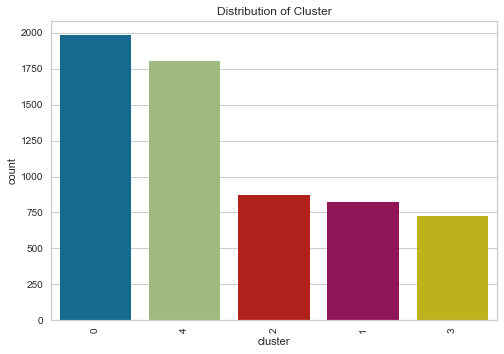

In [84]:
#how many sales per cluster
sns.countplot(x='cluster', data=sales6, order = sales6['cluster'].value_counts().index)
plt.title('Distribution of Cluster')
plt.xticks(rotation=90)

In [86]:
sales6.to_csv('sales_cluster.csv')